# End-to-End Data Cleaning Pipeline with Raha and Baran (Minimal and Integrated)
We build an end-to-end data cleaning pipeline with our configuration-free error detection and correction systems, Raha and Baran.

In [1]:
import pandas
import IPython.display
import ipywidgets

import raha

## 1. Instantiating the Detection and Correction Classes
We first instantiate the `Detection` and `Correction` classes.

In [2]:
from raha import analysis_utilities
app_1 = raha.Detection()
app_2 = raha.Correction()

# How many tuples would you label?
app_1.LABELING_BUDGET = 20
app_2.LABELING_BUDGET = 0

# Would you like to see the logs?
app_1.VERBOSE = True
app_2.VERBOSE = True

## 2. Instantiating the Dataset
We next load and instantiate the dataset object.

In [3]:
dataset_dictionary = {
        "name": "rayyan",
        "path": "datasets/rayyan/dirty.csv",
        "clean_path": "datasets/rayyan/clean.csv"
    }
d = app_1.initialize_dataset(dataset_dictionary)
d.dataframe.head()

,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list
0,235295,Late repair of injuries of the anal sphincter,eng,Proc R Soc Med,Proceedings of the Royal Society of Medicine,0035-9157 (Print) 0035-9157,64,12,1/1/71,1187-9,"{""A. G. Parks"",""J. F. McPartlin""}"
1,498345,Ebola Virus GP Gene Polyadenylation Versus RNA...,ENG,The Journal of infectious diseases,J. Infect. Dis.,1537-6613,,,4/2/15,,"{""Valentina A Volchkova"",""Jaroslav Vorac"",""Phi..."
2,789958,Duane retraction syndrome associated with ocul...,eng,Indian journal of ophthalmology,Indian J Ophthalmol,0301-4738,54,4,12/1/06,283-4,"{""Jitendra Jethani"",""Shashikant Shetty"",""Suche..."
3,169865,"[Noninvasive prenatal diagnosis of trisomy 21,...",pol,,,,84,0,1/1/13,714-9 ST - [Noninvasive prenatal diagnosis of ...,"{""G. Jakiel"",""K. Gorzelnik"",""J. G. Zimowski"",""..."
4,803653,Diagnosis and Management of Cutaneous B-cell L...,eng,Dermatologic clinics,Dermatol Clin,1558-0520,33,4,10/1/15,835-40,"{""Lauren C Pinter-Brown""}"


## 3. Generating Features and Clusters
Raha runs (all or the promising) error detection strategies on the dataset. This step could take a while because all the strategies should be run on the dataset. Raha then generates a feature vector for each data cell based on the output of error detection strategies. Raha next builds a hierarchical clustering model for our clustering-based sampling approach.

In [4]:
app_1.run_strategies(d)
app_1.generate_features(d)
app_1.build_clusters(d)

16 cells are detected by ["PVD", ["jounral_abbreviation", "x"]].
16 cells are detected by ["PVD", ["journal_title", "z"]].
838 cells are detected by ["PVD", ["author_list", "a"]].
15 cells are detected by ["PVD", ["jounral_abbreviation", "F"]].16 cells are detected by ["PVD", ["author_list", "["]].16 cells are detected by ["PVD", ["article_title", "Y"]].


439 cells are detected by ["PVD", ["author_list", "."]].16 cells are detected by ["PVD", ["article_title", "8"]].13 cells are detected by ["PVD", ["article_pagination", "P"]].364 cells are detected by ["PVD", ["journal_issn", "5"]].



342 cells are detected by ["PVD", ["author_list", "K"]].
10 cells are detected by ["PVD", ["article_pagination", "z"]].4 cells are detected by ["PVD", ["journal_issn", "d"]].3 cells are detected by ["PVD", ["article_title", ";"]].


604 cells are detected by ["PVD", ["author_list", "t"]].
248 cells are detected by ["PVD", ["article_title", "C"]].271 cells are detected by ["PVD", ["article_pagination", 

/home/adrian/source/MA/raha/raha/detection.py:94: FutureWarning: Possible nested set at position 1
  if len(re.findall("[" + ch + "]", value, re.UNICODE)) > 0:
/home/adrian/source/MA/raha/raha/detection.py:94: FutureWarning: Possible nested set at position 1
  if len(re.findall("[" + ch + "]", value, re.UNICODE)) > 0:
/home/adrian/source/MA/raha/raha/detection.py:94: FutureWarning: Possible nested set at position 1
  if len(re.findall("[" + ch + "]", value, re.UNICODE)) > 0:
/home/adrian/source/MA/raha/raha/detection.py:94: FutureWarning: Possible nested set at position 1
  if len(re.findall("[" + ch + "]", value, re.UNICODE)) > 0:
/home/adrian/source/MA/raha/raha/detection.py:94: FutureWarning: Possible nested set at position 1
  if len(re.findall("[" + ch + "]", value, re.UNICODE)) > 0:


## 4. Interactive Tuple Sampling and Labeling
Raha then iteratively samples a tuple. We should label data cells of each sampled tuple.

In [5]:
def on_button_clicked(_):
    for j in range(0, len(texts)):
        cell = (d.sampled_tuple, j)
        error_label = 0
        correction = texts[j].value
        if d.dataframe.iloc[cell] != correction:
            error_label = 1
        d.labeled_cells[cell] = [error_label, correction]
    d.labeled_tuples[d.sampled_tuple] = 1

app_1.sample_tuple(d)
print("Fix the dirty cells in the following sampled tuple.")
sampled_tuple = pandas.DataFrame(data=[d.dataframe.iloc[d.sampled_tuple, :]], columns=d.dataframe.columns)
IPython.display.display(sampled_tuple)  
texts = [ipywidgets.Text(value=d.dataframe.iloc[d.sampled_tuple, j]) for j in range(d.dataframe.shape[1])]
button = ipywidgets.Button(description="Save the Annotation")
button.on_click(on_button_clicked)
output = ipywidgets.VBox(children=texts + [button])
IPython.display.display(output)

Tuple 225 is sampled.
Fix the dirty cells in the following sampled tuple.


,id,article_title,article_language,journal_title,jounral_abbreviation,journal_issn,article_jvolumn,article_jissue,article_jcreated_at,article_pagination,author_list
225,441393,The novel applications of the quantitative ana...,,,,,0,0,,,{NULL}


For the sake of time, we use the ground truth of the dataset to label tuples below.

In [6]:
%%capture
while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
    app_1.sample_tuple(d)
    if d.has_ground_truth:
        app_1.label_with_ground_truth(d)

## 5. Propagating User Labels and Predicting the Labels
Raha then propagates each user label through its cluster. Raha then trains and applies one classifier per data column to predict the label of the rest of data cells.

In [7]:
app_1.propagate_labels(d)
app_1.predict_labels(d)

The number of labeled data cells increased from 220 to 6325.
A classifier is trained and applied on column 0.
A classifier is trained and applied on column 1.
A classifier is trained and applied on column 2.
A classifier is trained and applied on column 3.
A classifier is trained and applied on column 4.
A classifier is trained and applied on column 5.
A classifier is trained and applied on column 6.
A classifier is trained and applied on column 7.
A classifier is trained and applied on column 8.
A classifier is trained and applied on column 9.
A classifier is trained and applied on column 10.


## 6. Initializing and Updating the Error Corrector Models
Baran initializes the error corrector models. Baran then iteratively samples a tuple. We should label data cells of each sampled tuple. It then udpates the models accordingly and generates a feature vector for each pair of a data error and a correction candidate. Finally, it trains and applies a classifier to each data column to predict the final correction of each data error. Since we already labeled tuples for Raha, we use the same labeled tuples and do not label new tuples here.

In [8]:
app_2.initialize_models(d)
app_2.initialize_dataset(d)
for si in d.labeled_tuples:
    d.sampled_tuple = si
    app_2.update_models(d)
    app_2.generate_features(d)
    app_2.predict_corrections(d)

The error corrector models are initialized.
The error corrector models are updated with new labeled tuple 567.
214513 pairs of (a data error, a potential correction) are featurized.
Prediction Method in this step:
    Column 1: No train 0
    Column 6: No train 0
    Column 7: No train 0
    Column 8: No train 0
    Column 9: No train 0
    Column 10: No train 0
Train sizes in this step:
    Column 1: 1834
    Column 6: 366
    Column 7: 90
    Column 8: 1188
    Column 9: 866
    Column 10: 2640
Corrections identified in this step:
    Column 1: 0.0 Mean correction confidence: nan
    Column 6: 0.0 Mean correction confidence: nan
    Column 7: 0.0 Mean correction confidence: nan
    Column 8: 0.0 Mean correction confidence: nan
    Column 9: 0.0 Mean correction confidence: nan
    Column 10: 0.0 Mean correction confidence: nan
Corrections applied in this step:
    Column 1: 0 Real changes: 0
    Column 6: 0 Real changes: 0
    Column 7: 0 Real changes: 0
    Column 8: 0 Real changes: 

## 7. Storing Results
Both Raha and Baran can also store the error detection/correction results.

In [9]:
app_1.store_results(d)
app_2.store_results(d)

The results are stored in datasets/rayyan/raha-baran-results-rayyan/error-detection/detection.dataset.
The results are stored in datasets/rayyan/raha-baran-results-rayyan/error-correction/correction.dataset.


## 8. Evaluating the Data Cleaning Task
We can finally evaluate our data cleaning task.

In [10]:
edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])
evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": "{:.2f}".format(edp), 
                                      "Recall": "{:.2f}".format(edr), "F1 Score": "{:.2f}".format(edf)}, ignore_index=True)
evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": "{:.2f}".format(ecp), 
                                      "Recall": "{:.2f}".format(ecr), "F1 Score": "{:.2f}".format(ecf)}, ignore_index=True)
evaluation_df.head()

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.72,0.77,0.75
1,Error Correction (Baran),0.49,0.22,0.30


In [11]:
import importlib
importlib.reload(analysis_utilities)

<module 'raha.analysis_utilities' from '/home/adrian/source/MA/raha/raha/analysis_utilities.py'>

In [12]:
actual_errors = d.get_actual_errors_dictionary()

Histograms of the probabilities of the detection algorithm by (label, true label)


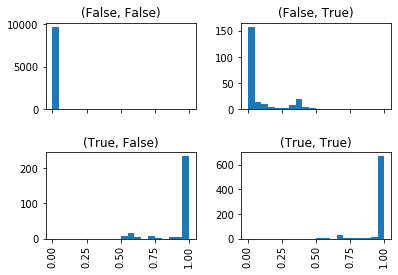

In [13]:
analysis_utilities.detection_evaluation(d, actual_errors)

In [14]:
correction_confidence_df = analysis_utilities.get_correction_confidence_df(d, actual_errors)

In [18]:
correction_confidence_df.shape[0]

418

In [15]:
(correction_confidence_df["confidence"] < 0.98).sum()

0

Distribution of confidences for wrong (False) and correct (True) corrections:


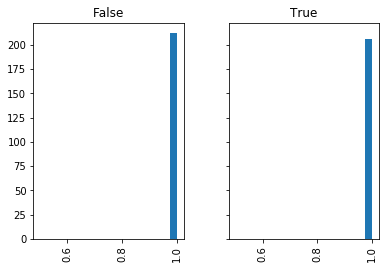

In [16]:
analysis_utilities.correction_confidence_distributions(correction_confidence_df)

Empirical probability of a correction being wrong given its confidence:


/home/adrian/anaconda3/envs/raha/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


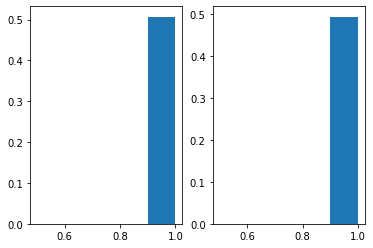

In [17]:
f = analysis_utilities.correction_correctness_by_confidence(correction_confidence_df)
f.show()